In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [4]:
import numpy as np

def rel_series(token, bins=100):
    
    # Get the raw token series.
    series = Token.token_series(token)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    rel = np.zeros(bins)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        rel[offset] = count/total_count
        
    return rel

In [52]:
weights = np.zeros((len(tokens), 100))

for i, token in enumerate(list(tokens.keys())):
    weights[i] = rel_series(token)

In [74]:
# Difference from expected.
centered = weights - 1/100

# Absolute values.
abs_vals = abs(centered)

# Average of distance from expected.
avg = abs_vals.mean(axis=0)

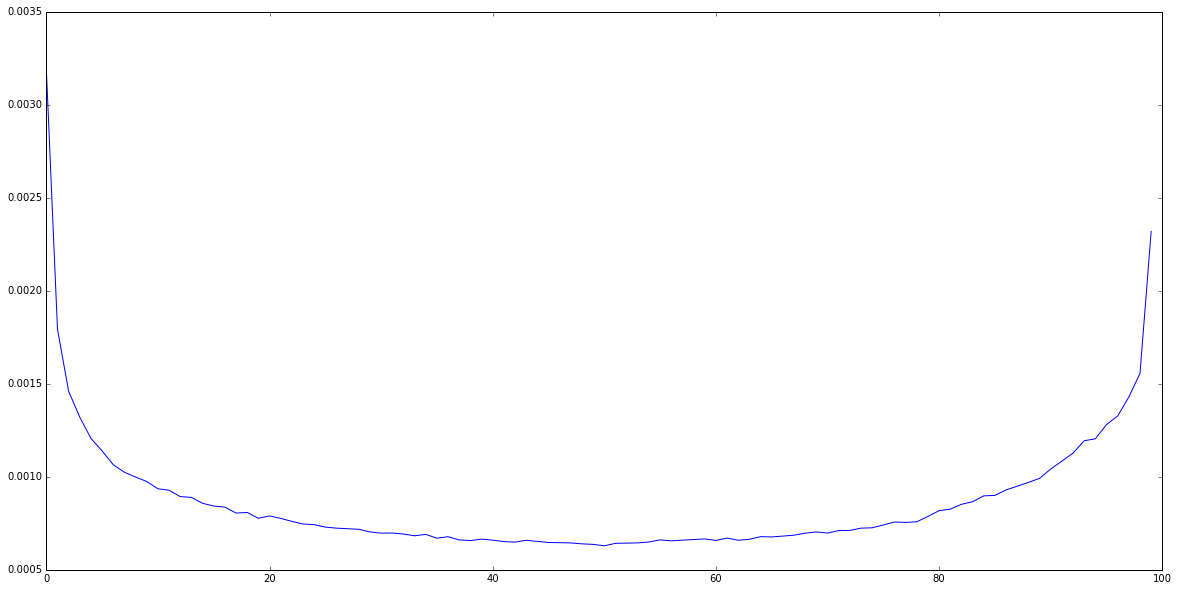

In [75]:
plt.figure(figsize=(20,10))
plt.plot(avg)
plt.show()